In [1]:
# import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# read data from csv file
data = pd.read_csv('apples_and_oranges.csv')

<AxesSubplot:xlabel='Weight', ylabel='Size'>

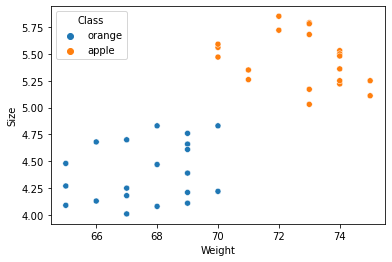

In [3]:
import seaborn as sns
sns.scatterplot(x="Weight",
                    y="Size",
                    hue="Class",
                    data=data)

In [4]:
# splitting data into training and test set
training_set,test_set = train_test_split(data,test_size=0.2,random_state=1)


In [5]:
# prepare data for applying it to svm
x_train = training_set.iloc[:,0:2].values  # data
y_train = training_set.iloc[:,2].values  # target
x_test = test_set.iloc[:,0:2].values  # data
y_test = test_set.iloc[:,2].values  # target

In [10]:
# fitting the data (train a model)
classifier = SVC(kernel='rbf',random_state=1,C=1,gamma='auto')
classifier.fit(x_train,y_train)

SVC(C=1, gamma='auto', random_state=1)

In [11]:
# perform prediction on x_test data
y_pred = classifier.predict(x_test)
print(y_pred)

['orange' 'orange' 'apple' 'apple' 'orange' 'apple' 'orange' 'apple']


In [12]:
# creating confusion matrix and accuracy calculation
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = float(cm.diagonal().sum())/len(y_test)
print('model accuracy is:',accuracy*100,'%')

[[3 0]
 [1 4]]
model accuracy is: 87.5 %


In [12]:
x_test1 = [[73,6]] # for new data testing
y_pred1 = classifier.predict(x_test1)
print("Predicted class is:",y_pred1[0])

Predicted class is: apple
